In [1]:
#this file will evaluate how features distrute before and after data normalization
#use standard scalar or seo johnson to normalize the data to find the better one

In [2]:
#read the un-normalzied merged data from the desktop 
import os
os.getcwd()

'c:\\Users\\Zi Li\\Desktop\\capstone project'

In [3]:
import pandas as pd
data = pd.read_csv("merge.csv")

#recatogrize diagnosis variable for binary classification later 
data['pheno.diagnosis'] = data['pheno.diagnosis'].map({
    'clinically normal': 'Y',
    'clinical abnormal': 'N'
})

data = data[[col for col in data.columns if col != 'pheno.diagnosis'] + ['pheno.diagnosis']]


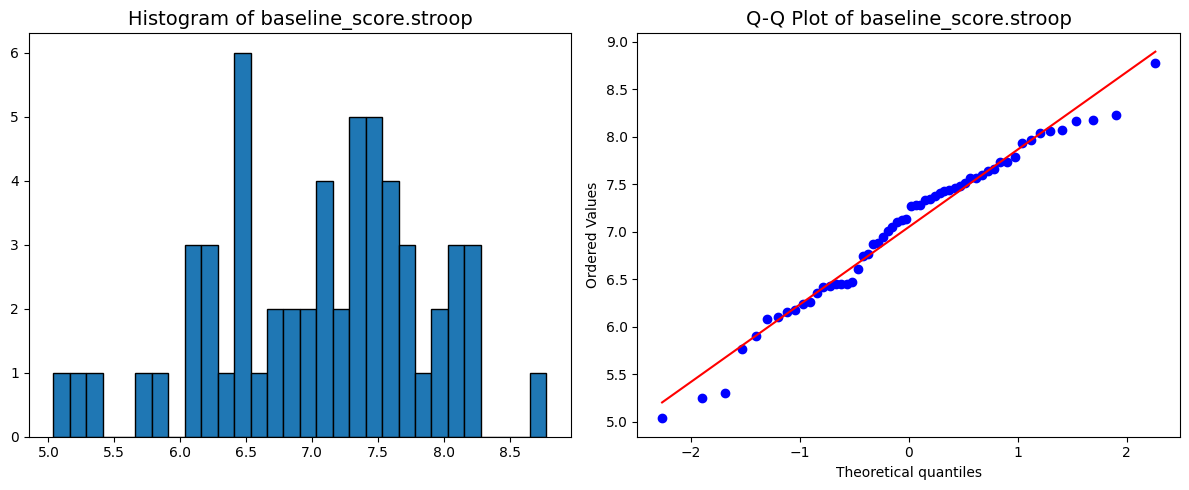

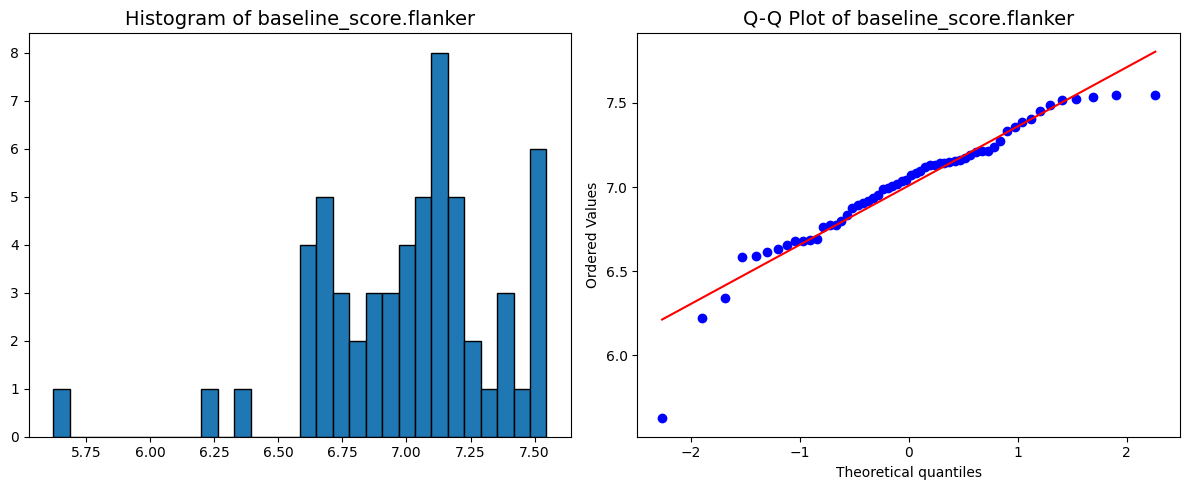

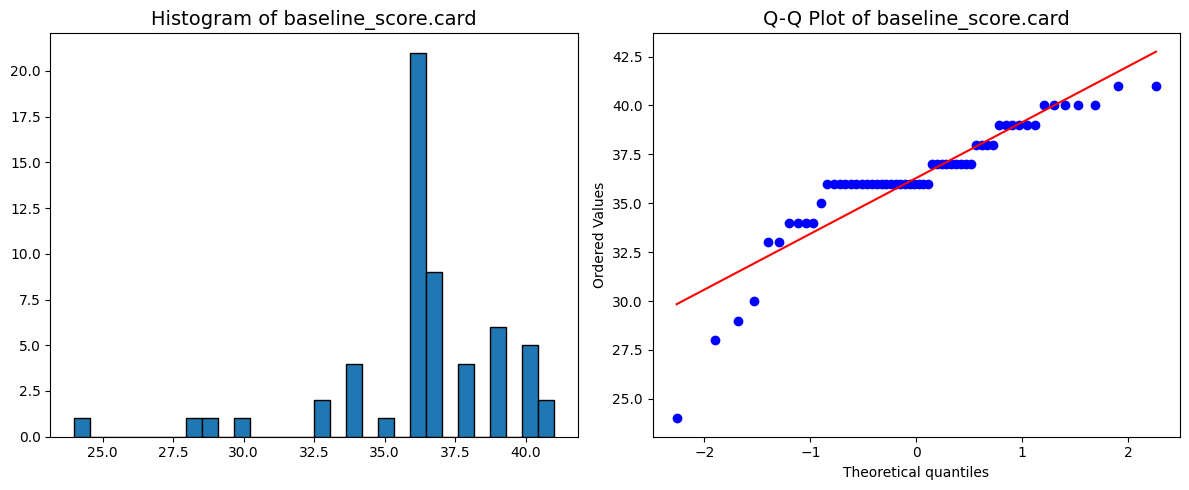

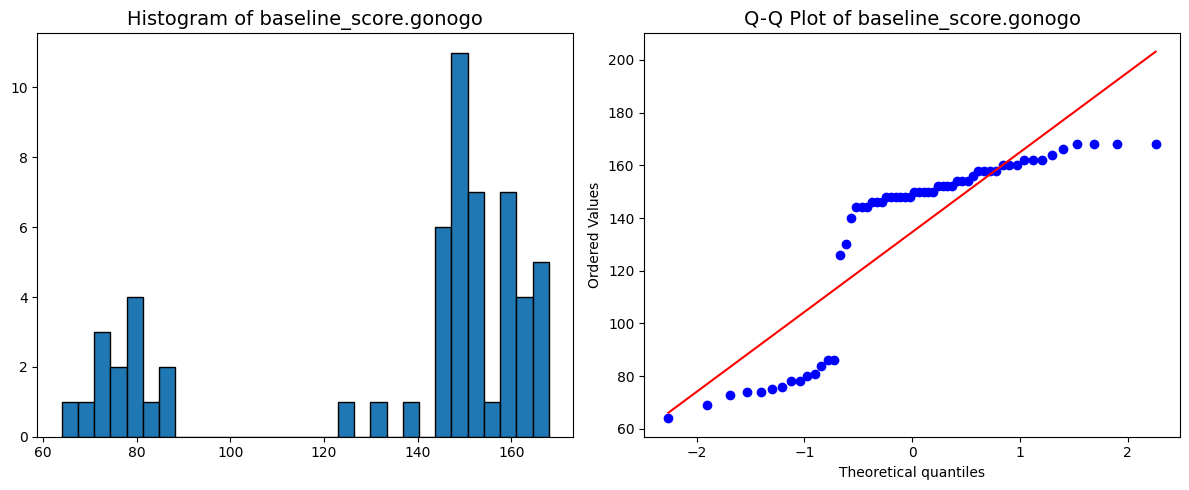

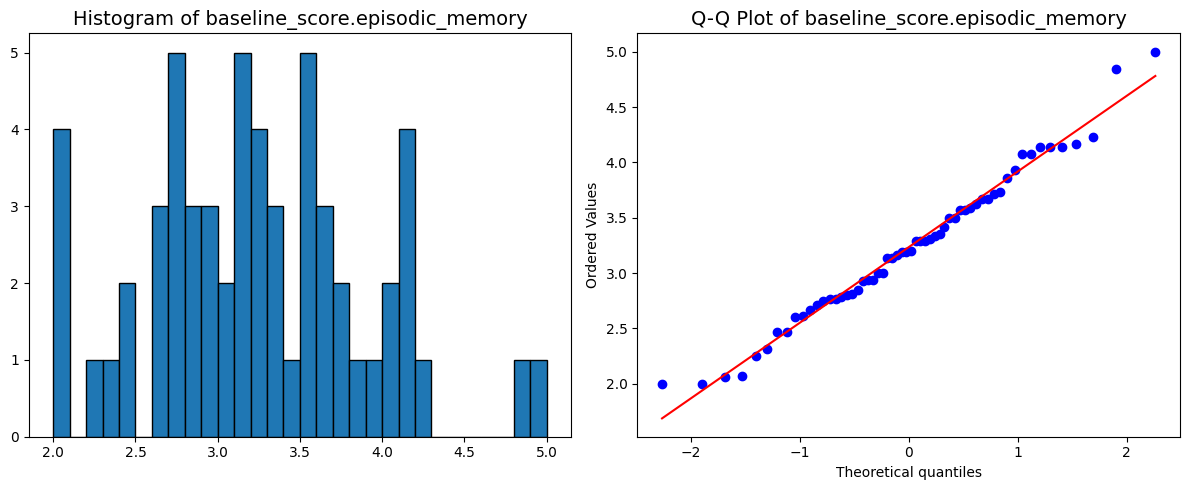

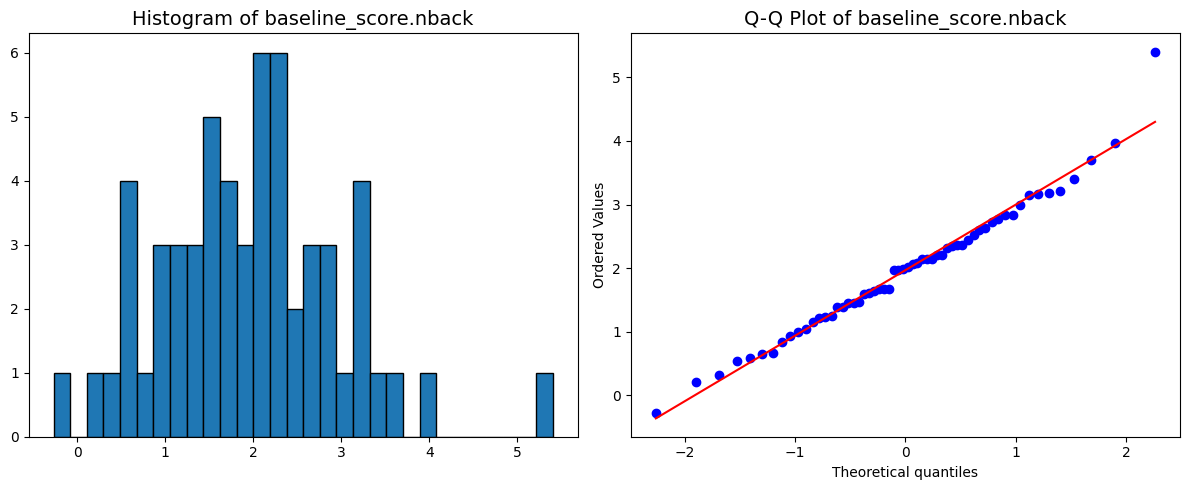

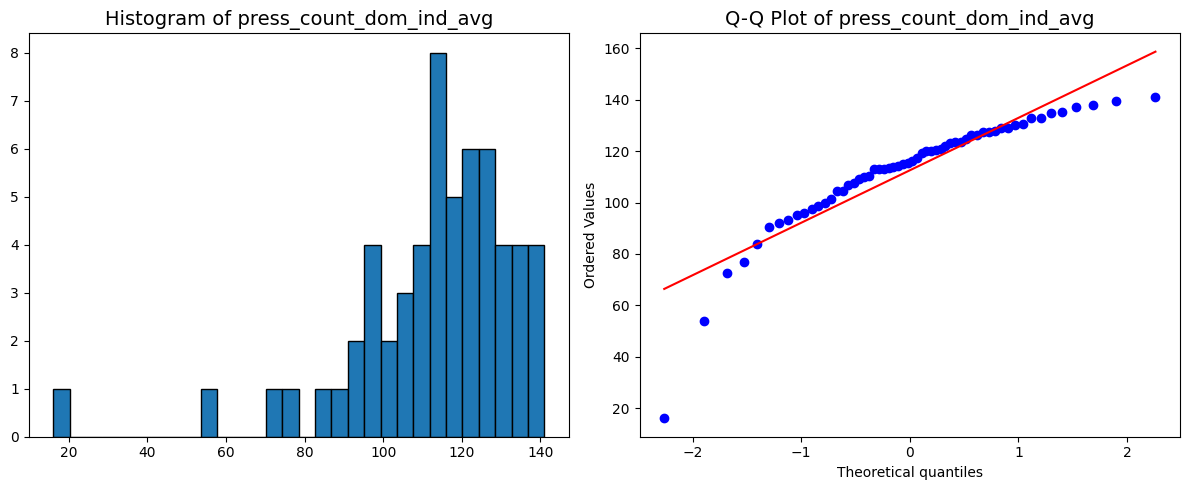

In [4]:
#checking normality, using histogram and qq plot
import matplotlib.pyplot as plt
import scipy.stats as stats

#Loop through numeric features only (excluding pheno.diagnosis)
numeric_columns = data.select_dtypes(include='number').columns

for col in numeric_columns:
    data_temp = data[col].dropna()  # Handle missing values if any

    plt.figure(figsize=(12, 5))

    #Histogram
    plt.subplot(1, 2, 1)
    plt.hist(data_temp, bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}', fontsize=14)

    #Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data_temp, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}', fontsize=14)

    plt.tight_layout()
    plt.show()


In [5]:
#get quantative evidence of normality of all the numeric variables, before normalization 
import pandas as pd
import scipy.stats as stats

#Initialize result storage
normality_results = []

#Loop through numeric columns
numeric_columns = data.select_dtypes(include='number').columns

for col in numeric_columns:
    data_temp = data[col].dropna()

    skewness = stats.skew(data_temp)
    kurtosis = stats.kurtosis(data_temp)
    shapiro_p = stats.shapiro(data_temp)[1]  # p-value from Shapiro-Wilk test

    normality_results.append({
        'Feature': col,
        'Skewness': round(skewness, 4),
        'Kurtosis': round(kurtosis, 4),
        'Shapiro-Wilk p-value': round(shapiro_p, 4)
    })

#Convert to DataFrame for clear display
normality_data = pd.DataFrame(normality_results)

In [6]:
#now use yeo-johnson for normalization,
#PowerTransformer automatically selects the best λ (lambda) parameter for each feature.
from sklearn.preprocessing import PowerTransformer

#Initialize PowerTransformer with Yeo-Johnson method
pt = PowerTransformer(method='yeo-johnson')

#Loop through each numeric column and apply transformation
for col in numeric_columns:
    #Reshape required for PowerTransformer
    reshaped_data = data[col].values.reshape(-1, 1)
    
    #Apply transformation
    transformed_data = pt.fit_transform(reshaped_data)
    
    #Replace original column with transformed data
    data[col] = transformed_data.flatten()

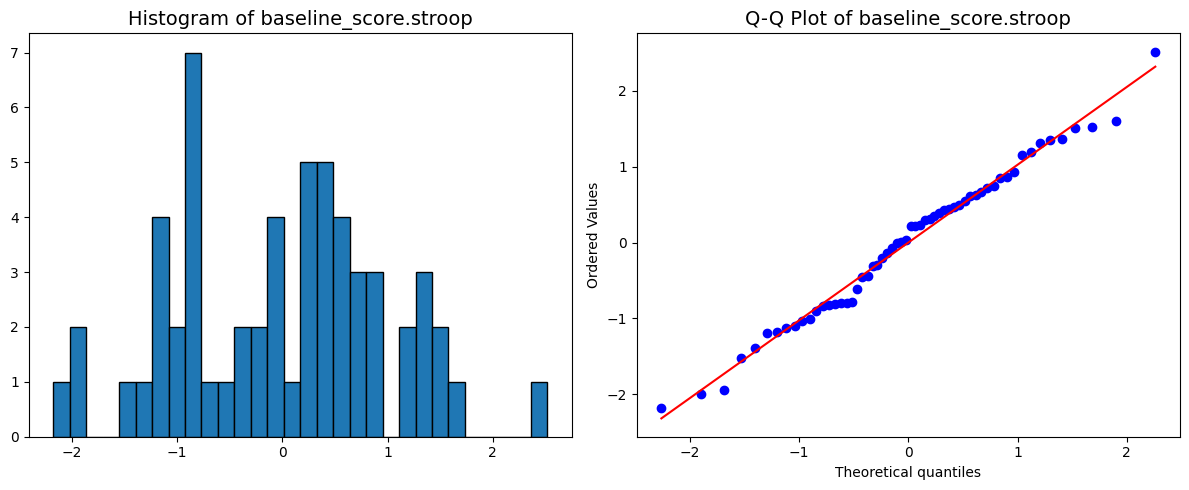

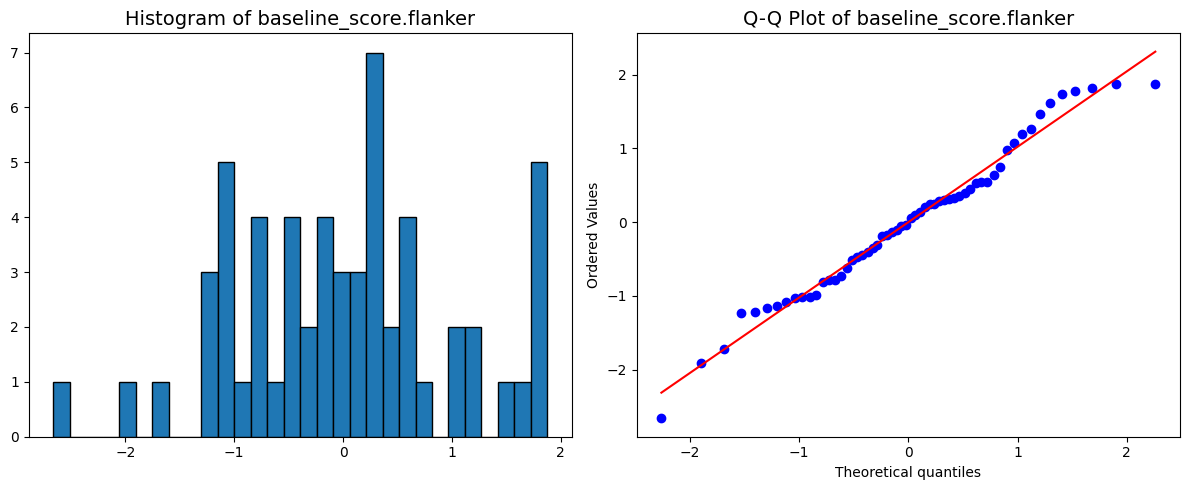

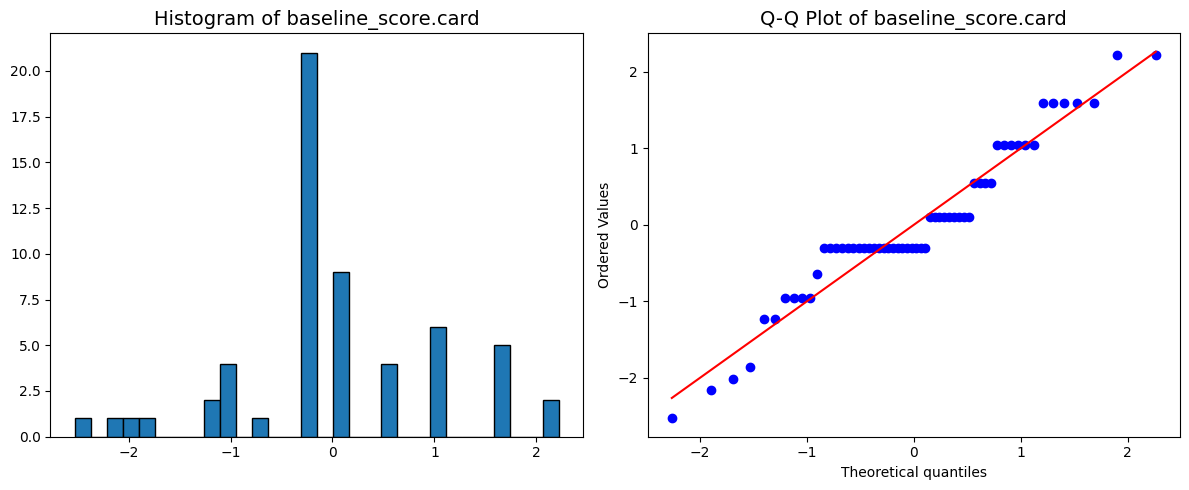

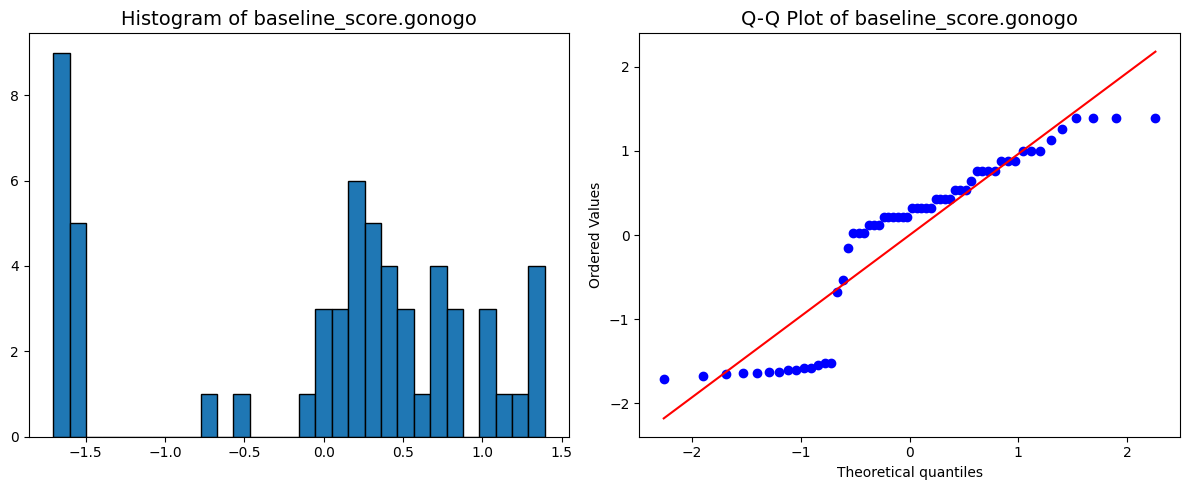

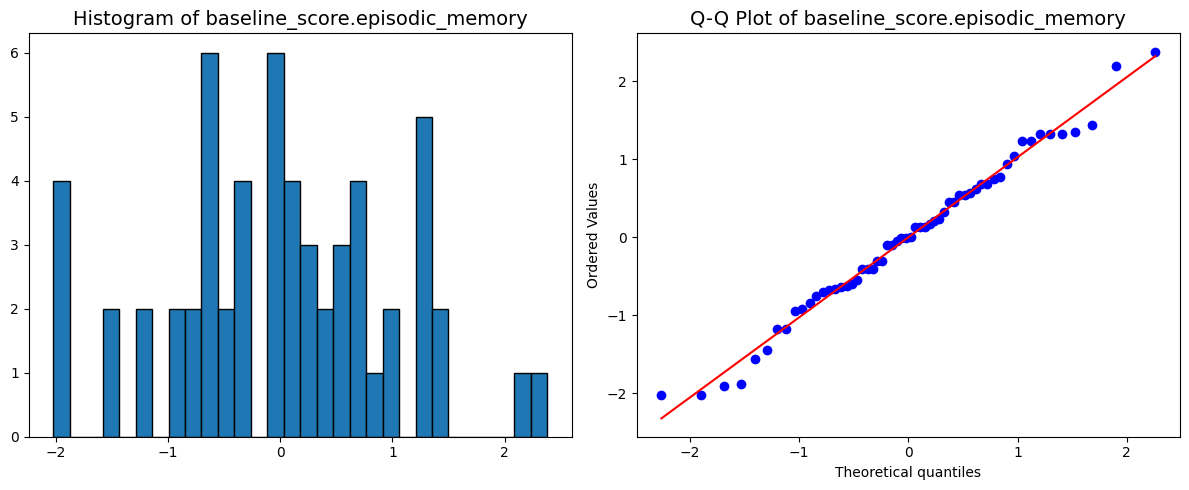

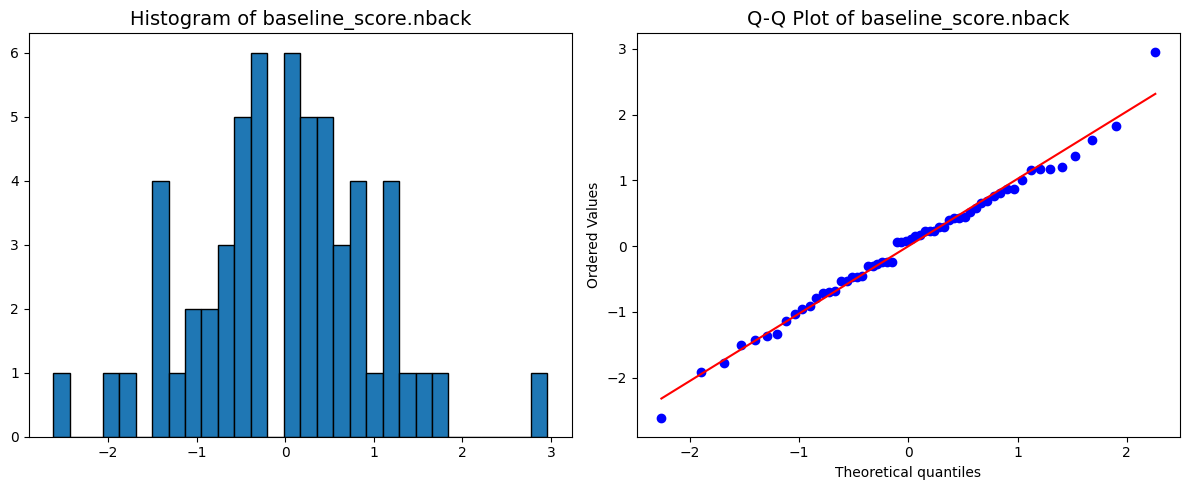

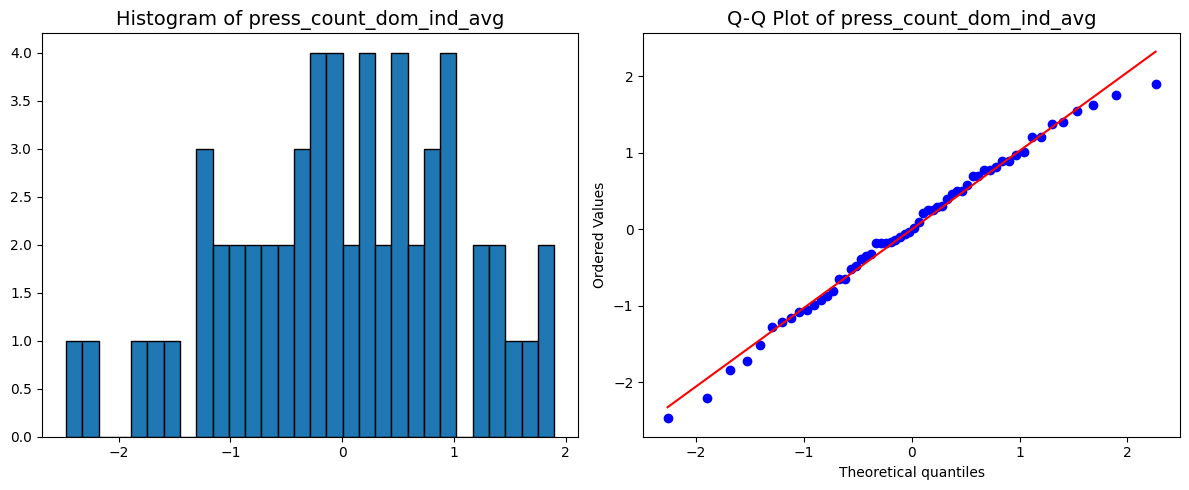

In [7]:
#normalization done, check for histogram and qq plot
import matplotlib.pyplot as plt
import scipy.stats as stats

#Loop through numeric features only (excluding pheno.diagnosis)
numeric_columns = data.select_dtypes(include='number').columns

for col in numeric_columns:
    data_temp = data[col].dropna()  # Handle missing values if any

    plt.figure(figsize=(12, 5))

    #Histogram
    plt.subplot(1, 2, 1)
    plt.hist(data_temp, bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}', fontsize=14)

    #Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data_temp, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}', fontsize=14)

    plt.tight_layout()
    plt.show()

In [8]:
#after normalization, check for quantative metrics of normality
import pandas as pd
import scipy.stats as stats

#Initialize result storage
normality_results = []

#Loop through numeric columns
numeric_columns = data.select_dtypes(include='number').columns

for col in numeric_columns:
    data_temp = data[col].dropna()

    skewness = stats.skew(data_temp)
    kurtosis = stats.kurtosis(data_temp)
    shapiro_p = stats.shapiro(data_temp)[1]  # p-value from Shapiro-Wilk test

    normality_results.append({
        'Feature': col,
        'Skewness': round(skewness, 4),
        'Kurtosis': round(kurtosis, 4),
        'Shapiro-Wilk p-value': round(shapiro_p, 4)
    })

#Convert to DataFrame for clear display
normality_data = pd.DataFrame(normality_results)
